###**Summary of Problem Statement**

---

IT leverages Incident Management process to ensure there is no impact to the daily Business operations. Incidents are reported by various Business and IT Users, End Users/ Vendors. 
The assignment of incidents to appropriate IT groups is still a manual process in many organizations. 
This increases response and resolution time, which result in user poor customer service.

**Incident handling:**
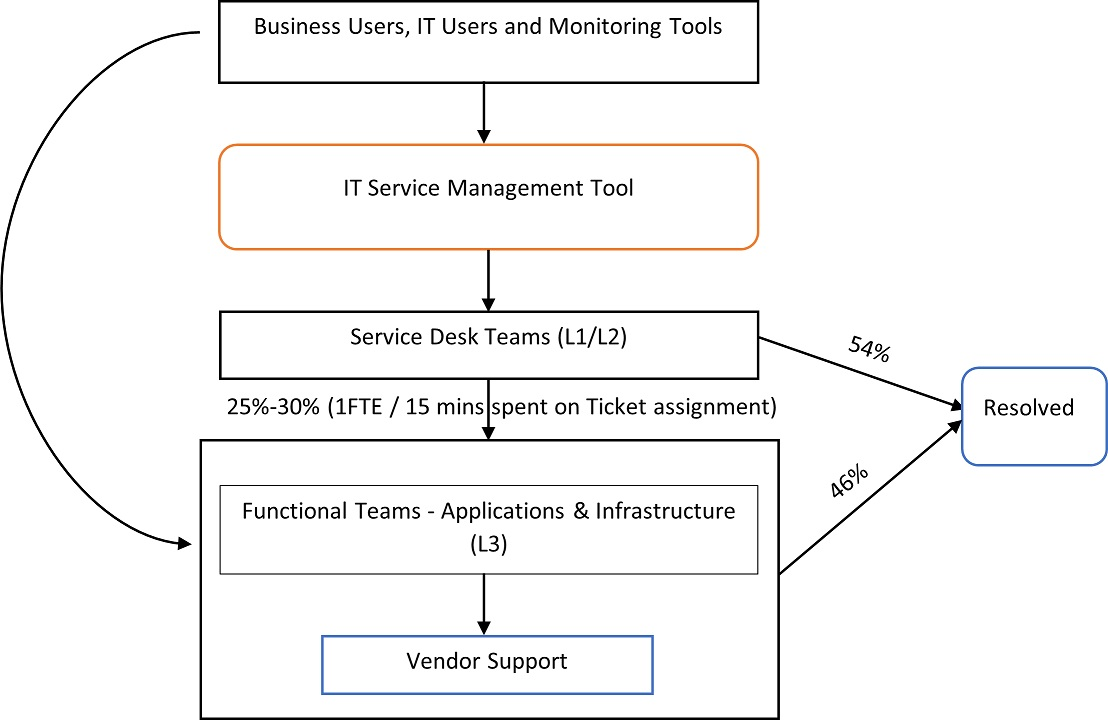

As indicated above, approximately, 1 FTE (min 15 mins) is spent by L1/L2 team just on evaluating whom to assign a ticket to. This impacts the efficiency of L1/L2 teams. 25% of the incidents are wrongly assigned to L3 teams and hence inviting additional efforts and degrading the efficiency of teams.



**Objectives**

---


1.	Analyze the data and gain insights on how incidents are assigned to various teams
2.	Build models based on given data, to automate future incident assignment process.
3.	Understand the pros and cons of various models based on model evaluation metrices
4.	Propose a solution that increases the efficiency of existing Process


**Assumptions**


1.   All decisions for incident assignment are taken based only on information provided in the ticket




In [1]:
!pip install ftfy

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=093f743d05bd906da32a37a23ba479f02e24e9ff9548732bde75d824990c4b6c
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


### Exploratory Data Anlaysis

In [2]:
# Import common libraries

from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from google.colab import drive
from matplotlib import pyplot as plt
import warnings
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import ftfy
warnings.filterwarnings('ignore')

In [3]:
# Mount google drive to import data
drive.mount('/content/drive')
# Read Data
df=pd.read_excel("/content/drive/MyDrive/Capstone Project NLP1 Group5/input_data.xlsx")

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df.shape

(8500, 4)

In [ ]:
print("Number of Unique classes: ",df['Assignment group'].nunique())
print("Unique classes: ",df['Assignment group'].unique())

Number of Unique classes:  74
Unique classes:  ['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [ ]:
# Check for null values
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
# Overview of Data
df.head(5)

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

Null Value Check


In [ ]:
df[df.Description.isna()]


Short description Description             Caller Assignment group
4395  i am locked out of skype         NaN  viyglzfo ajtfzpkb            GRP_0

In [ ]:
# Since there is only one data item in description column with null value, lets replace its content with short description
df.iloc[4395,1]="i am locked out of skype"

In [ ]:
df[df['Short description'].isna()]

Short description  ... Assignment group
2604               NaN  ...           GRP_34
3383               NaN  ...            GRP_0
3906               NaN  ...            GRP_0
3910               NaN  ...            GRP_0
3915               NaN  ...            GRP_0
3921               NaN  ...            GRP_0
3924               NaN  ...            GRP_0
4341               NaN  ...            GRP_0

[8 rows x 4 columns]

In [ ]:
# Let's replace NaN's in Short Description with blank
df.replace(np.nan,'',inplace=True)

Sentence Length

Max Len:  13001
Min Len:  1
Mean Len:  204.03070588235295
Median Len:  106.0


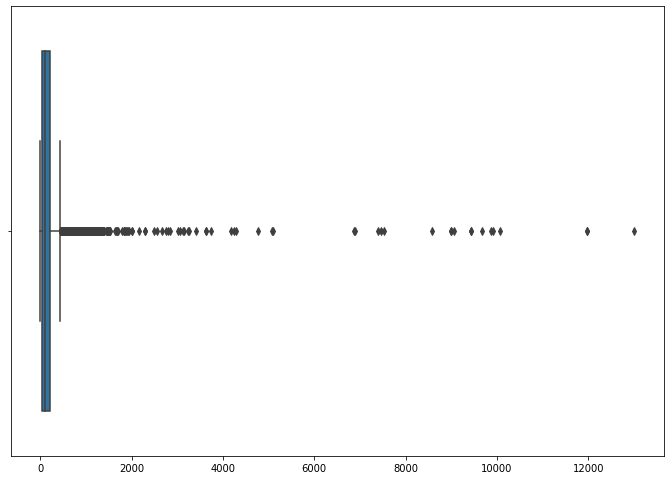

In [ ]:
# Check the sentence length
sentlen=[]
for sent in df.Description:
  sentlen.append(len(sent))


a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(sentlen)
print("Max Len: ",max(sentlen))
print("Min Len: ",min(sentlen))
print("Mean Len: ",np.mean(sentlen))
print("Median Len: ",np.median(sentlen))

Classes

In [ ]:
df_group =  df['Assignment group'].value_counts().rename_axis('Groups').reset_index(name='counts')
df_group['cum_counts'] = df_group['counts'].cumsum(axis=0)*100/df_group['counts'].sum()

In [ ]:
# Create figure with secondary y-axis
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_group['Groups'], y=df_group['cum_counts'], name="% cummulative count"),
    secondary_y=True,
)

fig.add_trace(
    go.Bar(x=df_group['Groups'], y=df_group['counts'], name="Group count"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="Pareto analysis of groups",
    width = 1100
)

# Set y-axes titles

fig.update_yaxes(title_text="Count", secondary_y=False)
fig.update_yaxes(title_text="% of count", secondary_y=True)

fig.show()

In [ ]:
df.groupby('Assignment group')['Assignment group'].count().sort_values(ascending=False).head(10)

Assignment group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
Name: Assignment group, dtype: int64

In [ ]:
df.groupby('Assignment group')['Assignment group'].count().sort_values(ascending=False).tail(10)

Assignment group
GRP_57    2
GRP_72    2
GRP_54    2
GRP_71    2
GRP_64    1
GRP_67    1
GRP_61    1
GRP_73    1
GRP_35    1
GRP_70    1
Name: Assignment group, dtype: int64

In [ ]:
# Almost half of the classes belog to GRP_0. This could be an indication that GRP_0 is L1/L2 team, where most of the incidents are handled.
# There are also classes that have very less allocations.


Junk/Binary Data

In [ ]:
# There seems to be some Junk/ binary data in the given set
df[df['Assignment group']=='GRP_30'].head(4)

Short description  ... Assignment group
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...  ...           GRP_30
1178                              ç”µè¯æœºæ²¡æœ‰å£°éŸ³  ...           GRP_30
1271             fe10 å¤å°å‡ºæ¥çº¸å¼ æ–‡å­—ä¸æ¸…æ™°  ...           GRP_30
1452            è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼  ...           GRP_30

[4 rows x 4 columns]

In [ ]:
# Remove unnecessary spaces
df.Description=df.Description.str.strip(' \t."')
df['Short description']=df['Short description'].str.strip(' \t."')

In [ ]:
# Let's convert Junk/Binary data
for i in np.arange(0,df.shape[0]):
    df.iloc[i,0]=ftfy.fix_text(df.iloc[i,0])

In [ ]:
# Remove convert from Short Description
for i in np.arange(0,df.shape[0]):
    df.iloc[i,1]=ftfy.fix_text(df.iloc[i,1])

In [ ]:
df[df['Assignment group']=='GRP_30'].head(4)

Short description  ... Assignment group
276   outlook收到箱中folder变为每天一个folder,office提示更新。  ...           GRP_30
1178                                    电话机没有声音  ...           GRP_30
1271                           fe10 复印出来纸张文字不清晰  ...           GRP_30
1452                              考勤系统进不去请处理谢谢!  ...           GRP_30

[4 rows x 4 columns]

In [ ]:
df['Description']=df.Description.str.strip(' \t."')
df['Short description']=df['Short description'].str.strip(' \t."')

In [ ]:
df.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

Analyse Caller

In [ ]:
topcallers=df.groupby(df.Caller)['Caller'].count().sort_values(ascending=False).head()

In [ ]:
topcallers

Caller
bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
Name: Caller, dtype: int64

In [ ]:
# Looking at the texts, it seems 1st and 2nd are automated tickets coming from monitoring_tool@company.com 
df[df['Caller'].isin(['bpctwhsn kzqsbmtp','ZkBogxib QsEJzdZO'])]

Short description  ... Assignment group
47    job Job_1424 failed in job_scheduler at: 10/31...  ...            GRP_6
50    job mm_zscr0099_dly_merktc3 failed in job_sche...  ...            GRP_8
59    job mm_zscr0099_dly_merktc2 failed in job_sche...  ...            GRP_8
60    job Job_3181 failed in job_scheduler at: 10/31...  ...            GRP_8
67    job Job_1338 failed in job_scheduler at: 10/31...  ...            GRP_9
...                                                 ...  ...              ...
8442              abended job in job_scheduler: Job_481  ...            GRP_8
8448              abended job in job_scheduler: Job_483  ...            GRP_8
8460             abended job in job_scheduler: Job_1148  ...            GRP_9
8462             abended job in job_scheduler: Job_1141  ...            GRP_9
8466  abended job in job_scheduler: bkwin_HostName_7...  ...            GRP_8

[961 rows x 4 columns]

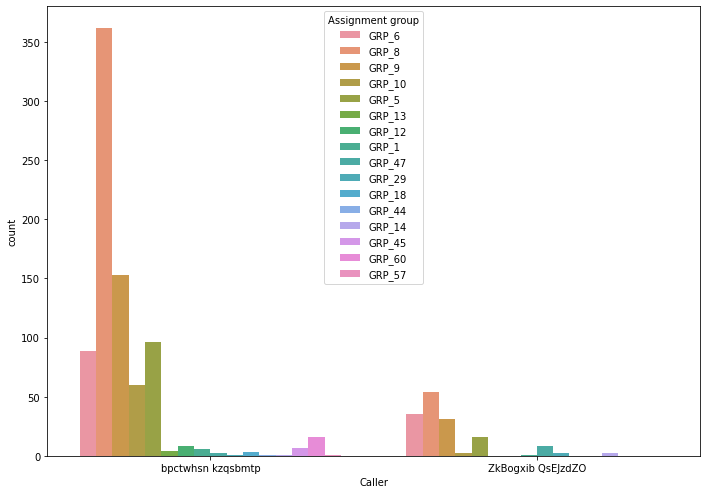

In [ ]:
cdf=df[df['Caller'].isin(['bpctwhsn kzqsbmtp','ZkBogxib QsEJzdZO'])]

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(cdf.Caller,hue=cdf['Assignment group'])

# Classification of incidents from top 2 groups

In [ ]:
asigngrp=cdf.groupby(['Assignment group'])['Assignment group'].count().sort_values(ascending=False)

print("Group","\tTotal_Count","Count_from_Monitoring Tool")
for grp in asigngrp.index:
  print(grp,'\t',df[df['Assignment group']==grp]['Assignment group'].count(),'\t\t',cdf[cdf['Assignment group']==grp]['Assignment group'].count())

Group 	Total_Count Count_from_Monitoring Tool
GRP_8 	 661 		 416
GRP_9 	 252 		 184
GRP_6 	 184 		 124
GRP_5 	 129 		 112
GRP_10 	 140 		 62
GRP_60 	 20 		 16
GRP_47 	 27 		 10
GRP_12 	 257 		 8
GRP_45 	 35 		 7
GRP_1 	 31 		 7
GRP_13 	 145 		 4
GRP_29 	 97 		 3
GRP_18 	 88 		 3
GRP_14 	 118 		 3
GRP_57 	 2 		 1
GRP_44 	 15 		 1


In [ ]:
# Top 5-6 groups have most of the data coming from Monitoring tool. Other groups do not have signofocant amount of assignment. These could possibly be wrong
# assignment or specific cases

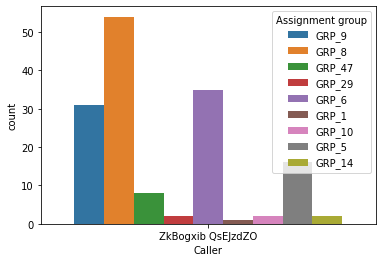

In [ ]:
cdf=df[df['Caller']=='ZkBogxib QsEJzdZO']
sns.countplot(cdf.Caller,hue=cdf['Assignment group'])

Duplicate Data

In [ ]:
df.shape

(8469, 6)

In [ ]:
df.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
df[df.duplicated()].count()

Short description    90
Description          90
Caller               90
Assignment group     90
dtype: int64

In [ ]:
# Let's drop duplicates by keeping first
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(8410, 4)

In [ ]:
df[df.duplicated(['Short description', 'Description', 'Caller'])]

Short description  ... Assignment group
1301         cannot review stock at mdw04 // mm 6720004  ...            GRP_0
4026  network problems (multiple applications are ru...  ...            GRP_0
6324  job Job_1314 failed in job_scheduler at: 08/25...  ...            GRP_9
6327  job Job_2668 failed in job_scheduler at: 08/25...  ...            GRP_8
6476  job Job_1953a failed in job_scheduler at: 08/2...  ...            GRP_6
6658  job Job_3028 failed in job_scheduler at: 08/23...  ...           GRP_12
7218                             outlook is not opening  ...            GRP_0
7828                                     account locked  ...           GRP_72
7984  security incidents - ( dsw #in33390850 ) : sus...  ...           GRP_12
7995  security incidents - ( dsw #in33407676 ) : tra...  ...           GRP_62
8002  security incidents - ( sw #in33544563 ) : poss...  ...           GRP_62

[11 rows x 4 columns]

In [ ]:
# We are also dropping these rows as these could be some noise as same data is assigned to different groups
df.drop(index=df[df.duplicated(['Short description', 'Description', 'Caller'])].index,inplace=True)

In [ ]:
# We have 89 cells which are entirely duplicated. So we have dropped them, keeping only 1st occurance of it. Also we have 9 items which are duplicated
# w.r.t 'Short description', 'Description', 'Caller' columns, but has different value for 'Assignment Group'. These rows are also dropped

In [ ]:
df[df.duplicated(['Description'])].count()

Short description    677
Description          677
Caller               677
Assignment group     677
dtype: int64

In [ ]:
# Dropping duplicates in Description column
df.drop_duplicates(subset=['Description'],inplace=True)

In [ ]:
# We are not removing duplicates from Short Description
df[df.duplicated(['Short description'])].count()

Short description    456
Description          456
Caller               456
Assignment group     456
dtype: int64

In [ ]:
df.shape

(7722, 4)

Language Detection and conversion

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
!python -m textblob.download_corpora

In [ ]:
df[df['Assignment group']=='GRP_30'].head(4)

Short description  ...                                         translated
267   outlook收到箱中folder变为每天一个folder,office提示更新。  ...  Outlook receives the folder in the box and bec...
1121                                    电话机没有声音  ...                            No sound from the phone
1209                           fe10 复印出来纸张文字不清晰  ...     fe10 The text on the copied paper is not clear
1377                              考勤系统进不去请处理谢谢!  ...  The attendance system can't enter, please deal...

[4 rows x 6 columns]

In [ ]:
# Detect language of Description cell and translate to English
df['language']=''
df['translated']=''
for i in np.arange(0,df.shape[0]):
    print(i)
    time.sleep(1.5)
    blob=TextBlob(df.iloc[i][1])
    lang=blob.detect_language()
    df.iloc[i,4]=lang
    if lang!='en':
        df.iloc[i,5]=blob.translate(to='en').raw
    else:
        df.iloc[i,5]=df.iloc[i,1]

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/clean2.xlsx')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.replace(np.nan,'',inplace=True)

In [ ]:
# Detect language of Short Description, translate to English and merge with Description column
import time
for i in np.arange(0,df.shape[0]):
    if df.iloc[i,4]!='en' and df.iloc[i,0]!='':
      try:
        time.sleep(1.5)
        blob=TextBlob(df.iloc[i,0])
        transl=blob.translate(to='en').raw
        print(transl)
        df.iloc[i,0]= transl
      except Exception:
        print('...',i)


Cleaning


In [ ]:
# Few data are questionnaire asking what type of outage. For these cells, Short Descrition seems to give better info, without special characters
# Let's now replace these descriptions with type of outage alone, using regex

In [ ]:
import re
for i in np.arange(0,df.shape[0]):
  print(i)
  txt=df.iloc[i,5]
  pattern1 = re.compile(r'[_]*[x][_]*network')
  matches1 = pattern1.finditer(txt)
  pattern2 = re.compile(r'[_]*[x][_]*power')
  matches2 = pattern2.finditer(txt)
  pattern3 = re.compile(r'[_]*[x][_]*circuit')
  matches3 = pattern3.finditer(txt)
  for mat in matches1:
    txt="Network Outage"
  for mat in matches2:
    txt="Power Outage"
  for mat in matches3:
    txt="Circuit Outage"

  df.iloc[i,5]=txt

In [ ]:
df.translated=df.translated.apply(lambda x: re.sub("(\[cid:image([0-9]+).[a-z]+@[a-zA-Z0-9]+.[a-zA-Z0-9]+\])",  r"", x))
df.translated=df.translated.apply(lambda x: re.sub("(SID_[0-9]+)",  r"\1 ", x))

In [ ]:
# Merge Description and Short Description
for i in np.arange(0,df.shape[0]):
    df.iloc[i,5]=df.iloc[i,0]+' '+df.iloc[i,5]

In [ ]:
for i in np.arange(0,df.shape[0]):
  if len(df.iloc[i,5])<20:
    print(i,df.iloc[i,5])

787 no boot no boot
1754 s s
3176 ie issue ie issue
3217 dds 
4976 no sound  no sound 
5723 ng_azubi locked 
5724 ng_azubi locked. 
6810 browser issue :    
7244 vpn link  vpn link 


In [ ]:
df['language'].unique()

array(['en', 'es', 'zh-CN', 'de', 'pt', 'cy', 'ru', 'pl', 'zu', 'zh-TW',
       'sv', 'af', 'ro', 'lb', 'gu', 'ja', 'sl', 'da', 'tr', '', 'tl',
       'ar', 'hu', 'gl', 'el', 'no', 'ku'], dtype=object)

In [ ]:
# Analysing the detected languages, it seems there are many wrongly identified items as above.

In [ ]:
df.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
language             0
translated           0
dtype: int64

Max Len:  10300
Min Len:  3
Mean Len:  222.51253517523662
Median Len:  145.0


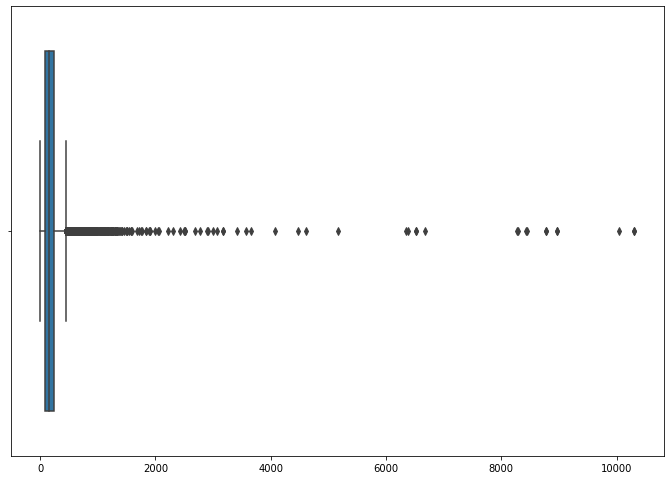

In [ ]:
sentlen=[]
for sent in df.translated:
  sentlen.append(len(sent))


a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(sentlen)
print("Max Len: ",max(sentlen))
print("Min Len: ",min(sentlen))
print("Mean Len: ",np.mean(sentlen))
print("Median Len: ",np.median(sentlen))

In [ ]:
(df[df.lang!='en'].trans).count()

1402

In [ ]:
import re
df.translated=df.translated.apply(lambda x: re.sub("(\\\)",  r" ", x))
df.translated=df.translated.apply(lambda x: re.sub("(///)",  r" ", x))
df.translated=df.translated.apply(lambda x: re.sub("(/)",  r" ", x))
df.translated=df.translated.apply(lambda x: re.sub(" [0-9]+ ",  r" ", x))
df.translated=df.translated.apply(lambda x: re.sub("[  ]+",  r" ", x))

In [ ]:
df.translated=df.translated.apply(lambda x: re.sub("(SID_[0-9]+)",  r"\1 ", x))
df.translated=df.translated.apply(lambda x: re.sub("__*",  r"", x))

In [ ]:
from bs4 import BeautifulSoup
# Remove Name from text
for i in np.arange(0,df.shape[0]):
  df.iloc[i,5]=df.iloc[i,5].replace(df.iloc[i,2],'')
  df.iloc[i,5] = BeautifulSoup(df.iloc[i,5], "lxml").text

# Remove unicode data
for i in np.arange(0,df.shape[0]):
    if '_x000D' in df.iloc[i,5]:
        df.iloc[i,5]=df.iloc[i,5].replace('_x000D',' ')

# Remove unwanted characters
for i in np.arange(0,df.shape[0]):
    if '_\n' in df.iloc[i,5]:
        df.iloc[i,5]=df.iloc[i,5].replace('_\n',' ')


for i in np.arange(0,df.shape[0]):
    if '\u200e' in df.iloc[i,5]:
      df.iloc[i,5]=df.iloc[i,5].replace('\u200e','')


In [ ]:
df.to_excel('/content/drive/MyDrive/fclean1.xlsx')

Word Clouds


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
stopwords = set(STOPWORDS)


In [ ]:
def generateclound(data):
  comment_words = ''
  for val in data:
      
      # typecaste each val to string
      val = str(val)
  
      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

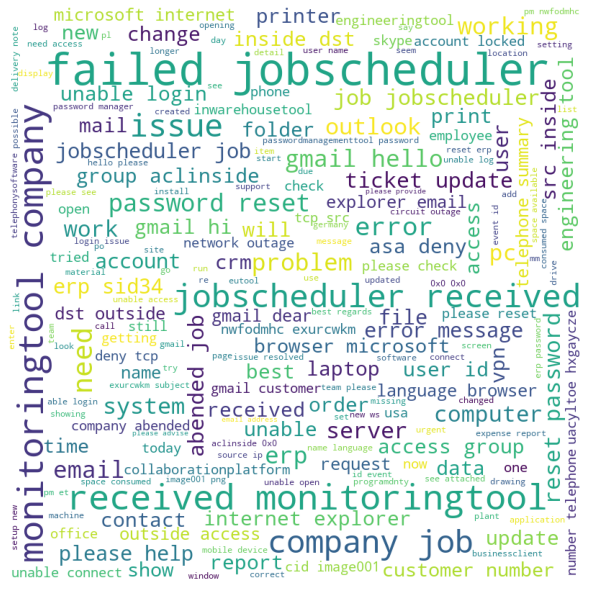

In [ ]:
# World Cloud for whole document after cleaning
generateclound(df.translated)

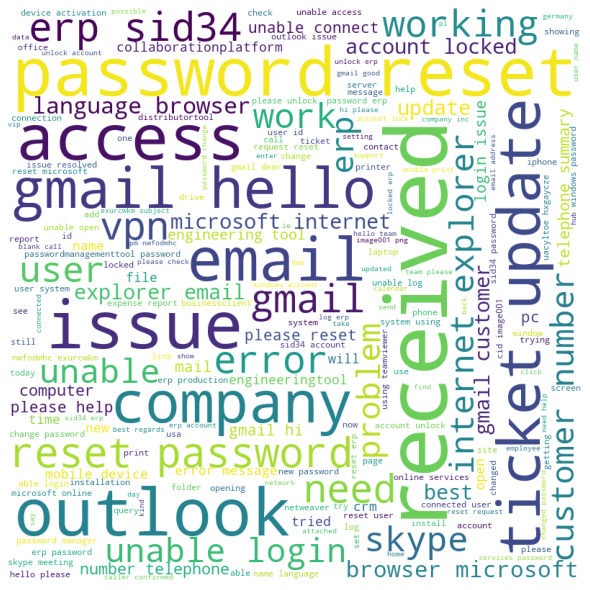

In [ ]:
# World Cloud for GRP_0
generateclound(df[df['Assignment group']=='GRP_0'].translated)

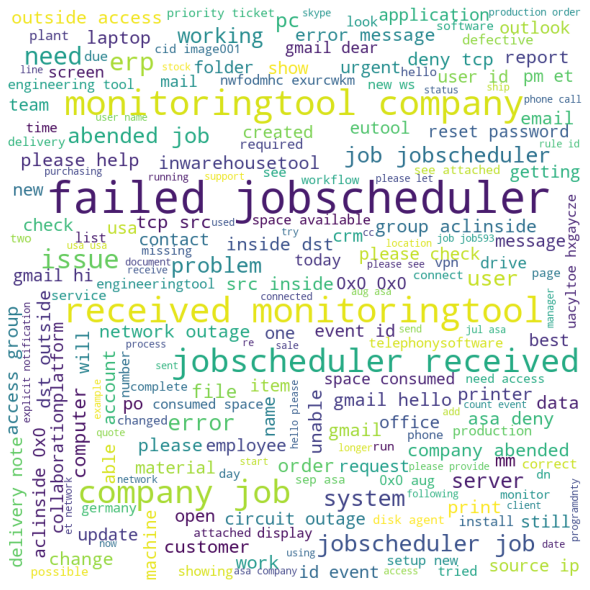

In [ ]:
# World Cloud for class other thatn GRP_0
generateclound(df[df['Assignment group']!='GRP_0'].translated)

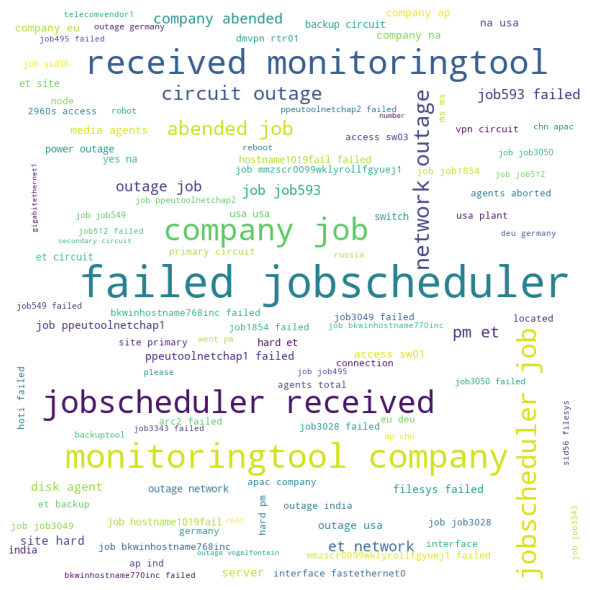

In [ ]:
# World Cloud for GRP_8
generateclound(df[df['Assignment group']=='GRP_8'].translated)

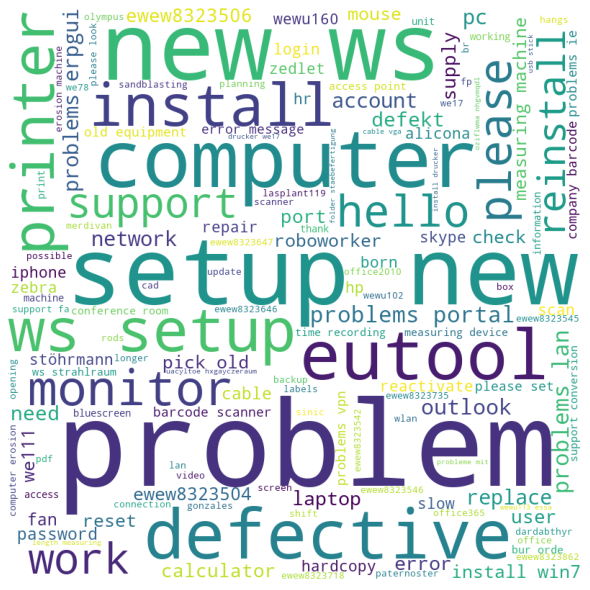

In [ ]:
# Word Cloud for GRP_24
generateclound(df[df['Assignment group']=='GRP_24'].translated)

Sentence Length

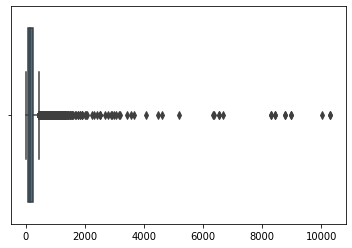

In [ ]:
# Let's now look at sentence length again
sentlen=[]
for sent in df.translated:
  sentlen.append(len(sent))

sns.boxplot(sentlen)

In [ ]:
df.to_excel("/content/drive/MyDrive/fclean1.xlsx")

In [4]:
df=pd.read_excel('/content/drive/MyDrive/fclean1.xlsx')

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.replace(np.nan,'',inplace=True)

Grouping Classes with low data

In [87]:
cdf=df.groupby('Assignment group')['Assignment group'].count().sort_values(ascending=False).tail(25)

In [88]:
df['reducedclass']=''
for i in np.arange(0,df.shape[0]):
  if df.iloc[i,3] in cdf:
    df.iloc[i,6]='GRP_75'
  else:
    df.iloc[i,6]=df.iloc[i,3]

In [165]:
df['binclass']=''
for i in np.arange(0,df.shape[0]):
  if df.iloc[i,3]=='GRP_0':
    df.iloc[i,7]=0
  else:
    df.iloc[i,7]=1

###Models

####Count Vectorizer

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Assignment group'])
Y= le.transform(df['Assignment group'])


In [156]:
vectorizer=CountVectorizer(binary=True, max_features=10000, ngram_range=(1,2))
X=vectorizer.fit_transform(df['translated'])


In [157]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
xtrain.shape

(5472, 10000)

In [ ]:
xtest.shape

(2346, 10000)

**Naive Bayes**

In [10]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
nb = BernoulliNB()
nb.fit(xtrain, ytrain)
pred = nb.predict(xtest)
print('Training accuracy:',accuracy_score(ytrain, nb.predict(xtrain)))
print('Testing accuracy:',accuracy_score(ytest, pred))

Training accuracy: 0.5519005847953217
Testing accuracy: 0.5170502983802217


**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(xtrain, ytrain)
pred = sv.predict(xtest)
print('Training accuracy:',accuracy_score(ytrain, sv.predict(xtrain)))
print('Testing accuracy:',accuracy_score(ytest, pred))

Training accuracy: 0.7370248538011696
Testing accuracy: 0.5703324808184144


**Random Forest**

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
print('Training accuracy:',accuracy_score(ytrain, rf.predict(xtrain)))
print('Testing accuracy:',accuracy_score(ytest, rf.predict(xtest)))

Training accuracy: 0.997624269005848
Testing accuracy: 0.6159420289855072


####TF IDF

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
tvect=TfidfVectorizer(stop_words='english')
vectors=tvect.fit_transform(df['translated'])
feature_names = tvect.get_feature_names()
X = vectors.todense()

In [ ]:
# Let's do PCA and find how well features can explain the data

In [ ]:
from sklearn import decomposition
import matplotlib.pyplot as plt

In [ ]:
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

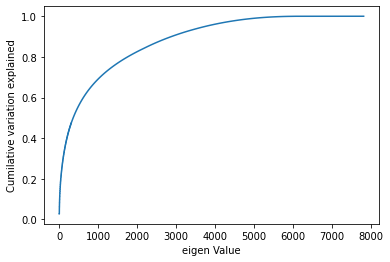

In [ ]:
plt.step(list(range(1,7819)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumilative variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
x = pca.transform(X)

**Random Forest**

In [ ]:
# With PCA

In [151]:
xtrain,xtest,ytrain,ytest=train_test_split(x,Y,test_size=0.3,random_state=42,stratify=Y)

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
print('Training accuracy:',accuracy_score(ytrain, rf.predict(xtrain)))
print('Testing accuracy:',accuracy_score(ytest, rf.predict(xtest)))

Training accuracy: 0.9978070175438597
Testing accuracy: 0.5068201193520887


In [ ]:
# Without PCA

In [152]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=42)

In [153]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
print('Training accuracy:',accuracy_score(ytrain, rf.predict(xtrain)))
print('Testing accuracy:',accuracy_score(ytest, rf.predict(xtest)))

Training accuracy: 0.9970760233918129
Testing accuracy: 0.5157715260017051


In [ ]:
# Without PCA gave better results.

**SVM**

In [ ]:
sv=SVC()

sv.fit(xtrain, ytrain)
pred = sv.predict(xtest)
print(accuracy_score(ytest, pred))

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
nb = BernoulliNB()
nb.fit(xtrain, ytrain)
print('Training Accuracy: ',accuracy_score(ytrain, nb.predict(xtrain)))
pred = nb.predict(xtest)
print('Testing Accuracy: ',accuracy_score(ytest, pred))

Training Accuracy:  0.5051169590643275
Testing Accuracy:  0.4919011082693947


Lime Visualizations

In [ ]:
!pip install lime

In [169]:
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)
class_names=list(df['binclass'].unique())
explainer = LimeTextExplainer(class_names=class_names)

idx = 1
exp = explainer.explain_instance(df['translated'][idx], c.predict_proba)
print('Document id: %d' % idx)
print('Predicted class =', class_names[rf.predict(xtest[idx]).reshape(1,-1)[0,0]])
# print('True class: %s' % class_names[ytest[idx]])

Document id: 1
Predicted class = 0


In [170]:
exp.show_in_notebook(text=False)

####Glove Emdeddings



Data Preperation

In [115]:
# Let's split the Assignment Group and keep only the numbers and then convert it into Categorical Data

y=df['reducedclass'].apply(lambda x: x.split('_')[1])
le = preprocessing.LabelEncoder()
le.fit(y)
Y= le.transform(y)
Y=tf.keras.utils.to_categorical(Y,num_classes=74)

In [116]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['translated'],
    Y,
    test_size=0.3, 
    random_state=42
)

Tokenize data

In [117]:
# Let's Tokenize the data, with vocabulary size as 20k

desired_vocab_size = 10000 
t = tf.keras.preprocessing.text.Tokenizer(num_words=desired_vocab_size) # num_words -> Vocablury size
t.fit_on_texts(X_train.tolist())

In [118]:
# Though desired vocabulary size is 20k, we only have ~14k unique words in vocabulary
len(t.word_index)

14792

In [119]:
# Training Sequence
X_train = t.texts_to_sequences(X_train.tolist())
# Test Sequence
X_test = t.texts_to_sequences(X_test.tolist())

In [120]:
# Let's fix the length of sentences to 300 (Mean snetence length was around 200)
max_review_length = 250
#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre', truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre', truncating='post')

In [ ]:
X_train.shape

(5472, 250)

In [ ]:
X_test.shape

(2346, 250)

In [121]:
embeddings_dict = {}
with open("/content/drive/MyDrive/Glove6B/glove.6B.300d.txt", 'r',) as f:
    for line in f:
      values = line.split()
      word = values[0]
      gvector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = gvector

In [122]:
embedding_vector_length=300

In [123]:
# Create embedding matrix of all words in the vocabulary

embedding_matrix = np.zeros((desired_vocab_size + 1, embedding_vector_length))
for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):   
        break
    try:
        embedding_vector = embeddings_dict[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
      pass


**LSTM**

In [125]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(256)) #RNN State - size of cell state and hidden state
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(74,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(X_train,y_train,
          epochs=10,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 1/10
171/171 [==============================] - 17s 90ms/step - loss: 2.2845 - accuracy: 0.5079 - val_loss: 1.9776 - val_accuracy: 0.5341
Epoch 2/10
171/171 [==============================] - 15s 86ms/step - loss: 1.8943 - accuracy: 0.5471 - val_loss: 1.8069 - val_accuracy: 0.5388
Epoch 3/10
171/171 [==============================] - 15s 85ms/step - loss: 1.7264 - accuracy: 0.5654 - val_loss: 1.7449 - val_accuracy: 0.5631
Epoch 4/10
171/171 [==============================] - 14s 85ms/step - loss: 1.7540 - accuracy: 0.5603 - val_loss: 1.7862 - val_accuracy: 0.5601
Epoch 5/10
171/171 [==============================] - 15s 86ms/step - loss: 1.5575 - accuracy: 0.5936 - val_loss: 1.6725 - val_accuracy: 0.5652
Epoch 6/10
171/171 [==============================] - 15s 86ms/step - loss: 1.4027 - accuracy: 0.6137 - val_loss: 1.6029 - val_accuracy: 0.5793
Epoch 7/10
171/171 [==============================] - 15s 85ms/step - loss: 1.2857 - accuracy: 0.6385 - val_loss: 1.5696 - val_accuracy:

In [126]:
history=model.fit(X_train,y_train,initial_epoch=10,
          epochs=25,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 11/25
171/171 [==============================] - 15s 86ms/step - loss: 0.8464 - accuracy: 0.7445 - val_loss: 1.5881 - val_accuracy: 0.5976
Epoch 12/25
171/171 [==============================] - 15s 85ms/step - loss: 0.7505 - accuracy: 0.7738 - val_loss: 1.5996 - val_accuracy: 0.5861
Epoch 13/25
171/171 [==============================] - 15s 85ms/step - loss: 0.6604 - accuracy: 0.8023 - val_loss: 1.5755 - val_accuracy: 0.6006
Epoch 14/25
171/171 [==============================] - 15s 85ms/step - loss: 0.5755 - accuracy: 0.8289 - val_loss: 1.6494 - val_accuracy: 0.6044
Epoch 15/25
171/171 [==============================] - 15s 85ms/step - loss: 0.5012 - accuracy: 0.8543 - val_loss: 1.6870 - val_accuracy: 0.6002
Epoch 16/25
171/171 [==============================] - 14s 85ms/step - loss: 0.4477 - accuracy: 0.8648 - val_loss: 1.7500 - val_accuracy: 0.5980
Epoch 17/25
171/171 [==============================] - 14s 85ms/step - loss: 0.3852 - accuracy: 0.8902 - val_loss: 1.7279 - val_ac

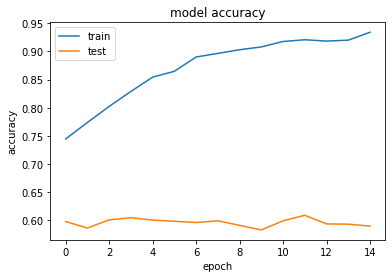

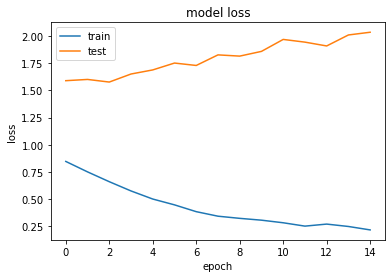

In [127]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**BIdirectional LSTM**

In [128]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True),merge_mode='sum')) #RNN State - size of cell state and hidden state
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True),merge_mode='concat'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(96,))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(74,activation='softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,
          epochs=10,
          batch_size=32,          
          validation_data=(X_test, y_test))

Epoch 1/10
171/171 [==============================] - 69s 361ms/step - loss: 2.3715 - accuracy: 0.5033 - val_loss: 2.1663 - val_accuracy: 0.5060
Epoch 2/10
171/171 [==============================] - 59s 347ms/step - loss: 2.0953 - accuracy: 0.5311 - val_loss: 2.0627 - val_accuracy: 0.5102
Epoch 3/10
171/171 [==============================] - 59s 347ms/step - loss: 1.9908 - accuracy: 0.5378 - val_loss: 1.9356 - val_accuracy: 0.5456
Epoch 4/10
171/171 [==============================] - 59s 347ms/step - loss: 1.8956 - accuracy: 0.5457 - val_loss: 1.8542 - val_accuracy: 0.5452
Epoch 5/10
171/171 [==============================] - 59s 347ms/step - loss: 1.8009 - accuracy: 0.5561 - val_loss: 1.7761 - val_accuracy: 0.5512
Epoch 6/10
171/171 [==============================] - 60s 349ms/step - loss: 1.7084 - accuracy: 0.5738 - val_loss: 1.7896 - val_accuracy: 0.5533
Epoch 7/10
171/171 [==============================] - 60s 348ms/step - loss: 1.6547 - accuracy: 0.5758 - val_loss: 1.7251 - val_ac

****

#### Word2Vec

In [38]:
y=df['Assignment group'].apply(lambda x: x.split('_')[1])

le = preprocessing.LabelEncoder()
le.fit(y)
Y= le.transform(y)
Y=tf.keras.utils.to_categorical(Y,num_classes=74)

In [44]:
# split X and y into training and testing sets
X_train, X_test, trainY, testY = train_test_split(df['translated'], Y,test_size=0.3, random_state=2)

In [45]:
desired_vocab_size = 10000 #Vocablury size
t = tf.keras.preprocessing.text.Tokenizer(num_words=desired_vocab_size) # num_words -> Vocablury size

In [46]:
#Fit tokenizer with actual training data
t.fit_on_texts(X_train.tolist())

In [47]:
#Replace each word in the text with word's index
X_train = t.texts_to_sequences(X_train.tolist())

In [49]:
X_test = t.texts_to_sequences(X_test)

In [50]:
max_review_length = 250

In [51]:
#Pad training and test reviews
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        maxlen=max_review_length,
                                                        padding='pre',
                                                        truncating='post')
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, 
                                                       maxlen=max_review_length, 
                                                       padding='pre',
                                                       truncating='post')

In [25]:
import gensim.downloader as api

In [26]:
#Load Google word2vec model
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [27]:
embedding_vector_length = model.vector_size
# Google Word2Vec model has vocabulary size of 3M words. In this example, we have only 10000 words as vocabulary.
#  This means we do not require entire Google Word2Vec model. Rather, we will only take the embeddings of the words that are in our dataset vocabulary.

In [52]:
#Load word vectors for each word from Google Word2Vec model
for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > (desired_vocab_size+1):
        break
    try:
        embedding_vector = model[word] #Reading word's embedding from Google Word2Vec
        embedding_matrix[i] = embedding_vector
    except:
        pass

**LSTM**

In [59]:
#Initialize model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [60]:
model.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Flatten the data as we will use Dense layers
# model.add(tf.keras.layers.Flatten())

#Add Hidden layers (Dense layers)
model.add(tf.keras.layers.LSTM(256, activation='relu', input_shape=()))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))



model.add(tf.keras.layers.Dense(74, activation='softmax'))

#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 300)          3000300   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               570368    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 74)                9546      
Total params: 3,614,134
Trainable params: 613,322
Non-trainable params: 3,000,812
________________________________________

In [62]:
model.fit(X_train,trainY,
          epochs=10,
          batch_size=32,          
          validation_data=(X_test, testY))

Epoch 1/10
171/171 [==============================] - 57s 327ms/step - loss: 2.6714 - accuracy: 0.4470 - val_loss: 3.3330 - val_accuracy: 0.4685
Epoch 2/10
171/171 [==============================] - 54s 318ms/step - loss: 2.0575 - accuracy: 0.5322 - val_loss: 2.6901 - val_accuracy: 0.4800
Epoch 3/10
171/171 [==============================] - 55s 319ms/step - loss: 1.8700 - accuracy: 0.5546 - val_loss: 2.2617 - val_accuracy: 0.5034
Epoch 4/10
171/171 [==============================] - 54s 317ms/step - loss: 1.6884 - accuracy: 0.5786 - val_loss: 2.0480 - val_accuracy: 0.5158
Epoch 5/10
171/171 [==============================] - 54s 313ms/step - loss: 1.5411 - accuracy: 0.6054 - val_loss: 1.9712 - val_accuracy: 0.5426
Epoch 6/10
171/171 [==============================] - 54s 316ms/step - loss: 1.4148 - accuracy: 0.6248 - val_loss: 2.0796 - val_accuracy: 0.5341
Epoch 7/10
171/171 [==============================] - 54s 317ms/step - loss: 1.3457 - accuracy: 0.6393 - val_loss: 2.0090 - val_ac

**CNN**

In [65]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(desired_vocab_size + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=max_review_length) #Number of words in each review
          )

#Add first convolutional layer
model2.add(tf.keras.layers.Conv1D(32, #Number of filters 
                                 kernel_size=(3), #Size of the filter
                                 strides=1,
                                 activation='relu'))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model2.add(tf.keras.layers.Conv1D(128, kernel_size=(3), strides=2))
model2.add(tf.keras.layers.ReLU())

#normalize data
model2.add(tf.keras.layers.BatchNormalization())

#Use Global Average Pooling
model2.add(tf.keras.layers.GlobalAveragePooling1D())

#Output layer
model2.add(tf.keras.layers.Dense(74, activation='sigmoid'))
#Compile the model
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 300)          3000300   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 248, 32)           28832     
_________________________________________________________________
batch_normalization_3 (Batch (None, 248, 32)           128       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 123, 128)          12416     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 123, 128)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 123, 128)          512       
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)              

In [66]:
model2.fit(X_train,trainY,
          epochs=10,
          batch_size=32,          
          validation_data=(X_test, testY))

Epoch 1/10
171/171 [==============================] - 27s 11ms/step - loss: 2.9895 - accuracy: 0.4572 - val_loss: 2.8193 - val_accuracy: 0.4301
Epoch 2/10
171/171 [==============================] - 2s 9ms/step - loss: 2.1333 - accuracy: 0.5188 - val_loss: 2.6247 - val_accuracy: 0.4327
Epoch 3/10
171/171 [==============================] - 1s 9ms/step - loss: 1.9588 - accuracy: 0.5417 - val_loss: 2.2426 - val_accuracy: 0.4936
Epoch 4/10
171/171 [==============================] - 1s 8ms/step - loss: 1.8163 - accuracy: 0.5621 - val_loss: 2.0321 - val_accuracy: 0.5405
Epoch 5/10
171/171 [==============================] - 2s 9ms/step - loss: 1.6764 - accuracy: 0.6001 - val_loss: 2.3355 - val_accuracy: 0.4092
Epoch 6/10
171/171 [==============================] - 1s 9ms/step - loss: 1.5437 - accuracy: 0.6186 - val_loss: 1.9957 - val_accuracy: 0.5405
Epoch 7/10
171/171 [==============================] - 1s 8ms/step - loss: 1.4015 - accuracy: 0.6561 - val_loss: 2.0090 - val_accuracy: 0.5367
Epoc

#### BERT

In [67]:
!pip3 install --quiet transformers
!pip install sentencepiece

     |████████████████████████████████| 2.8 MB 4.2 MB/s 
     |████████████████████████████████| 895 kB 39.4 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 3.3 MB 35.5 MB/s 
     |████████████████████████████████| 636 kB 43.3 MB/s 
     |████████████████████████████████| 1.2 MB 4.2 MB/s 


In [68]:
from transformers import *
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y=df['Assignment group'].apply(lambda x: x.split('_')[1])
le.fit(y)
YY=le.transform(y)
Y=tf.keras.utils.to_categorical(YY,num_classes=74)

In [91]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y=df['reducedclass'].apply(lambda x: x.split('_')[1])
le.fit(y)
YY=le.transform(y)
Y=tf.keras.utils.to_categorical(YY,num_classes=50)

In [92]:
tokenized_texts = [tokenizer.tokenize(sent) for sent in df.translated]
max_length = 250
tokenized_texts = [sent[:max_length] for sent in tokenized_texts]

In [93]:
for i in range(len(tokenized_texts)):
    sent = tokenized_texts[i]
    sent = ['[CLS]'] + sent + ['[SEP]']
    tokenized_texts[i] = sent

In [94]:
input_ids = [tokenizer.convert_tokens_to_ids(sent) for sent in tokenized_texts]

In [95]:
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, maxlen=max_length+2, truncating='post', padding='post')

In [96]:
trainX, testX, trainY, testY = train_test_split(input_ids, Y, test_size=0.35, random_state=42)

In [97]:
testX,valX,testY,valY=train_test_split(testX,testY,test_size=.15,random_state=42)

In [98]:
# Create attention masks for training
train_attn_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in trainX:
  seq_mask = [float(i>0) for i in seq]
  train_attn_masks.append(seq_mask)

In [99]:
# Create attention masks for Test
test_attn_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in testX:
  seq_mask = [float(i>0) for i in seq]
  test_attn_masks.append(seq_mask)

In [100]:
# Create attention masks for Test
val_attn_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in valX:
  seq_mask = [float(i>0) for i in seq]
  val_attn_masks.append(seq_mask)

In [101]:
train_x_data = {'input_ids': np.array(trainX), 'attention_mask': np.array(train_attn_masks)}
test_x_data = {'input_ids': np.array(testX), 'attention_mask': np.array(test_attn_masks)}
val_x_data = {'input_ids': np.array(valX), 'attention_mask': np.array(val_attn_masks)}

In [102]:
MAX_SEQ_LEN=252
def create_model(n_out):
    input_ids = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name='input_ids')
    # input_type = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name='token_type_ids')
    input_mask = tf.keras.layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name='attention_mask')
    inputs = [input_ids, input_mask]
    bert = TFBertModel.from_pretrained('bert-base-uncased')
    bert_outputs = bert(inputs)
    last_hidden_states = bert_outputs.last_hidden_state
    avg = tf.keras.layers.GlobalAveragePooling1D()(last_hidden_states)
    output = tf.keras.layers.Dense(n_out, activation="softmax")(avg)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.summary()
    return model

In [103]:
def fine_tune(model, X_train, x_val, y_train, y_val):
    max_epochs = 2
    batch_size = 16
    opt = tf.keras.optimizers.Adam(learning_rate=3e-5,epsilon=1e-08, clipnorm=1.0)
    loss = tf.keras.losses.CategoricalCrossentropy()
    best_weights_file = "weights.h5"
    m_ckpt = tf.keras.callbacks.ModelCheckpoint(best_weights_file, monitor='auc', mode='max', verbose=2,
                             save_weights_only=True, save_best_only=True)
    model.compile(loss=loss, optimizer=opt, metrics=[tf.keras.metrics.AUC(multi_label=True, curve="ROC"),
                                                     tf.keras.metrics.categorical_crossentropy])
    model.fit(
        X_train, y_train,
        validation_data=(x_val, y_val),
        epochs=3,
        batch_size=batch_size,
        callbacks=[m_ckpt],
        verbose=2
    )

In [85]:
# Bert Model with all class predictions
modelx=create_model(74)
fine_tune(modelx,train_x_data,test_x_data, trainY, testY)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [104]:
# Bert Model with top 50 classes
modelx1=create_model(50)
fine_tune(modelx1,train_x_data,test_x_data, trainY, testY)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 252)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 252)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_average_pooling1d_3 (Glo (None, 768)          0           tf_bert_model_1[0][0]      

Prediciton- All class - Top Prediction

In [108]:
pred=modelx.predict(test_x_data)
predlist=[]

for i in pred:
  predlist.append(np.argsort(i)[-1:])


acty=[]
for i in testY:
  acty.append(np.argmax(i))

resultset=[]
for i in np.arange(0,len(acty)):
  if acty[i] in predlist[i]:
    resultset.append(1)
  else:
    resultset.append(0)

# Accuracy
resultset.count(1)/len(resultset)*100

53.18142734307825

Prediction All Class- Top 5 prediction

In [110]:
pred=modelx.predict(test_x_data)
predlist=[]

for i in pred:
  predlist.append(np.argsort(i)[-5:])


acty=[]
for i in testY:
  acty.append(np.argmax(i))

resultset=[]
for i in np.arange(0,len(acty)):
  if acty[i] in predlist[i]:
    resultset.append(1)
  else:
    resultset.append(0)

# Accuracy
resultset.count(1)/len(resultset)*100

70.63628546861564

Prediction - Top 50 Class- Top Prediction

In [143]:
pred1=modelx1.predict(train_x_data)
predlist=[]

for i in pred1:
  predlist.append(np.argsort(i)[-1:])
acty=[]

for i in trainY:
  acty.append(np.argmax(i))

resultset=[]
for i in np.arange(0,len(acty)):
  if acty[i] in predlist[i]:
    resultset.append(1)
  else:
    resultset.append(0)
# Accuracy
resultset.count(1)/len(resultset)*100

94.70576658138162

In [109]:
pred1=modelx1.predict(test_x_data)
predlist=[]

for i in pred1:
  predlist.append(np.argsort(i)[-1:])
acty=[]

for i in testY:
  acty.append(np.argmax(i))

resultset=[]
for i in np.arange(0,len(acty)):
  if acty[i] in predlist[i]:
    resultset.append(1)
  else:
    resultset.append(0)
# Accuracy
resultset.count(1)/len(resultset)*100

69.73344797936372

Prediction - Top 50 class, Top 5 Prediction score

In [112]:
pred1=modelx1.predict(test_x_data)
predlist=[]

for i in pred1:
  predlist.append(np.argsort(i)[-5:])
acty=[]

for i in testY:
  acty.append(np.argmax(i))

resultset=[]
for i in np.arange(0,len(acty)):
  if acty[i] in predlist[i]:
    resultset.append(1)
  else:
    resultset.append(0)
# Accuracy
resultset.count(1)/len(resultset)*100

91.27257093723131

Validation Set prediction

In [141]:
pred2=modelx1.predict(val_x_data)
predlist=[]

for i in pred2:
  predlist.append(np.argsort(i)[-1:])
acty=[]

for i in valY:
  acty.append(np.argmax(i))

resultset=[]
for i in np.arange(0,len(acty)):
  if acty[i] in predlist[i]:
    resultset.append(1)
  else:
    resultset.append(0)
# Accuracy
resultset.count(1)/len(resultset)*100

69.34306569343066

In [138]:
pred2=modelx1.predict(val_x_data)
predlist=[]

for i in pred2:
  predlist.append(np.argsort(i)[-5:])
acty=[]

for i in valY:
  acty.append(np.argmax(i))

resultset=[]
for i in np.arange(0,len(acty)):
  if acty[i] in predlist[i]:
    resultset.append(1)
  else:
    resultset.append(0)
# Accuracy
resultset.count(1)/len(resultset)*100

92.21411192214111

In [133]:
def bertPredict():
  for i in np.arange(0,10):
    toks=tokenizer.convert_ids_to_tokens(valX[i])
    sent=[]
    for j in toks:
      if j!='[CLS]' and j !='[SEP]' and j!='[PAD]':
        sent.append(j)
    sample=tokenizer.convert_tokens_to_string(sent)
    print('Text: ',sample)
    print("Actual Group:",le.inverse_transform([np.argmax(valY[i])]))
    sample=tokenizer.tokenize(sample)
    sample=sample[:200]
    sample = ['[CLS]'] + sample + ['[SEP]']
    inp=tokenizer.convert_tokens_to_ids(sample)
    inp=tf.keras.preprocessing.sequence.pad_sequences([inp], maxlen=max_length+2, truncating='post', padding='post')
    for seq in inp:
      sqmsk = [float(k>0) for k in seq]
    sqmsk
    # mytest = {'input_ids': np.array([valX[i]]), 'attention_mask': np.array([val_attn_masks[i]])}
    mytest={'input_ids': np.array([inp[0]]), 'attention_mask': np.array([sqmsk])}
    pred=modelx1.predict(mytest)
    # print(pred[0].shape)
    # print(np.argsort(pred[0])[-5:])
    lst=le.inverse_transform(np.argsort(pred[0])[-5:])[::-1]
    print('Top Prediction: ',lst)

In [134]:
# Predictions from Validation Set
bertPredict()

Text:  access denied in adoption scorecard manager user is unable to view adoption scorecard manager in microsoft crm dynamics , please check screenshot
Actual Group: ['22']
Top Prediction:  ['0' '22' '19' '34' '21']
Text:  not able to do pgi for deliveries 8057916405 916806308 - error co account assignments delivery customer - itens 7172133 - 6060954 - 7171068 ( co account assignments have different profit centers message # bk134 ) delivery customer 81295213 - itens 2668785 - 3647247 - 4859489 ( co account assignments have different profit centers message # bk134 ) delivery 9168048239 - customer 81295213 - itens 4768854 - 3752015 ( co account assignments have different profit centers message # bk134 ) delivery 9169147360 - customer 81295213 - item 6101508 - co account assignments have different profit centers message # bk134 )
Actual Group: ['44']
Top Prediction:  ['10' '13' '6' '75' '9']
Text:  hrtool etime option not visitble hrtool etime option not visitble
Actual Group: ['0']
Top 

In [136]:
from sklearn.metrics import confusion_matrix, classification_report

In [142]:
print(classification_report(predlist,acty))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       215
           1       0.00      0.00      0.00         0
           2       1.00      0.33      0.50        18
           3       0.00      0.00      0.00         5
           4       0.62      0.36      0.45        14
           5       0.17      1.00      0.29         1
           6       0.33      0.67      0.44         3
           7       0.00      0.00      0.00         2
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         3
          10       0.33      0.50      0.40         2
          11       0.40      0.50      0.44        12
          12       0.86      0.38      0.52        16
          13       0.33      1.00      0.50         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         1
          17       0.81    

####Results



```
               Training Acc | Testing Acc | Validation Acc
Count
Vectorizer-
1. NB                50            49.5
2. SVM               72            57.6
3. Random Forest     99            61.5

TF-IDF
4.NB                 49            48
5.SVM                79            59
6.Random Forest      99            61.4

Glove
LSTM                 93            60
Bi-Directional LSTM  65            58

Word2Vec
CNN                  73            56
LSTM                 72            57

BERT                 94            69           69

Top-5 Prediction
(BERT)                             91           92

```





---



Based on Above observations, Bert model was selected for classification